# Quick intro to Shapely

This jupyter notebook is heavily based on Sebastian Hohmann's GIS course

Contents:
- [1 Overview](#1-Overview)
- [2 Points](#2-Points)
  - [2.1 Defining points](#2.1-Defining-points)
  - [2.2 Getting co-ordinates](#2.2-Getting-co-ordinates)
  - [2.3 Calculating distances between points](#2.3-Calculating-distances-between-points)
- [3 Lines](#3-Lines)
  - [3.1 Defining lines](#3.1-Defining-lines)
  - [3.2 Getting co-ordinates, computing length](#3.2-Getting-co-ordinates,-computing-length)
- [4 Polygons](#4-Polygons)
  - [4.1 Defining Polygons](#4.1-Defining-Polygons)
  - [4.2 Getting bounds, envelope, exterior, area, centroid](#4.2-Getting-bounds,-envelope,-exterior,-area,-centroid)
    - [4.2.1 bounds](#4.2.1-bounds)
  - [4.2.2 envelope](#4.2.2-envelope)
    - [4.2.3 exterior](#4.2.3-exterior)
    - [4.2.4 area](#4.2.4-area)
    - [4.2.5 centroid](#4.2.5-centroid)
- [5 Geometry collections](#5-Geometry-collections)

In [2]:
from shapely.geometry import Point, LineString, Polygon

# 1 Overview

[Shapely](https://shapely.readthedocs.io/en/stable/manual.html) is a library for geometric objects. Fundamental types are
- `Points`
- `Lines`
- `Polygons`

Shapely can 
- create `Lines` or `Polygons` from `Collections` of `Points`
- calculate things like lengths and areas
- do geometric operations like `Union`, `Difference`, `Distance`
- do spatial queries between geometries like `Intersects`, `Touches`, `Within`

Geometric objects are tuples
- `Points` can be 2-D (x, y) or 3-D (x, y, z)
- `LineString` are sequence of points joined together (i.e. at least two co-ordinate tuples)
- `Polygon` filled area of at least 3 co-ordinate tuples

Geometric collections
- `MultiPoint`, `MultiLineString` and `MultiPolygon` are collections of `Point`, `LineString` and `Polygon` objects (i.e. they consist of multiple parts of the these types of objects)

# 2 Points

## 2.1 Defining points

In [3]:
p1 = Point(1, 1)
p2 = Point(2, 3)
p3 = Point(4, -2)

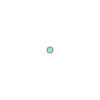

In [4]:
p1

In [5]:
type(p1)

shapely.geometry.point.Point

In [6]:
p1.geom_type

'Point'

## 2.2 Getting co-ordinates

In [7]:
p2.coords.xy

(array('d', [2.0]), array('d', [3.0]))

In [8]:
p2.x

2.0

In [9]:
p2.y

3.0

## 2.3 Calculating distances between points

In [10]:
p1.distance(p2)

2.23606797749979

we can also do this manually

In [11]:
((p1.x - p2.x) ** 2 + (p1.y - p2.y) ** 2) ** 0.5

2.23606797749979

# 3 Lines

## 3.1 Defining lines

Lines can be defined from 
- coordinates
- `Point` objects

In [12]:
l1 = LineString([p1, p2, p3])
l2 = LineString([(3.2, 1.6), (-2.7, 8.2)])

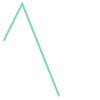

In [13]:
l1

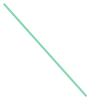

In [14]:
l2

In [15]:
l1.geom_type

'LineString'

## 3.2 Getting co-ordinates, computing length

In [16]:
l1.xy

(array('d', [1.0, 2.0, 4.0]), array('d', [1.0, 3.0, -2.0]))

In [17]:
l1.xy[0]

array('d', [1.0, 2.0, 4.0])

In [18]:
l1.length

7.6212327846342935

Once again, we can use the pythagorean theorem to compute the length ourselves

In [19]:
(((l1.xy[0][0] - l1.xy[0][1]) ** 2 +
 (l1.xy[1][0] - l1.xy[1][1]) ** 2) ** 0.5 +
 ((l1.xy[0][1] - l1.xy[0][2]) ** 2 +
 (l1.xy[1][1] - l1.xy[1][2]) ** 2) ** 0.5)

7.6212327846342935

# 4 Polygons

## 4.1 Defining Polygons

Once again, we can define polygons from existing `Point` objects or by listing their vertices

In [20]:
pol1 = Polygon([p1, p2, p3])
pol2 = Polygon([(3.2, 1.6), (-2.7, 8.2), (5.5, 5.5), (8.2, 8.2)])

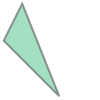

In [21]:
pol1

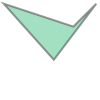

In [22]:
pol2

In [23]:
print(pol1)

POLYGON ((1 1, 2 3, 4 -2, 1 1))


Note the double parentheses. this is because polygons can have holes:

In [24]:
exterior = [(-180, 90), (-180, -90), (180, -90), (180, 90)]
hole = [(x*0.8, y*0.8) for x, y in exterior]
exterior_poly = Polygon(exterior)
poly_with_hole = Polygon(shell=exterior, holes=[hole])

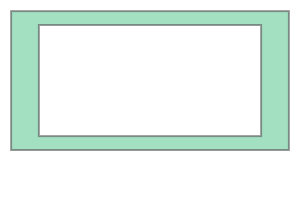

In [25]:
poly_with_hole

In [26]:
print(poly_with_hole)

POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90), (-144 72, -144 -72, 144 -72, 144 72, -144 72))


## 4.2 Getting bounds, envelope, exterior, area, centroid

### 4.2.1 bounds

Recall that we had defined `pol1` from `p1`, `p2`, `p3`. 

In [27]:
for p in [p1, p2, p3]:
    print(p.xy)

(array('d', [1.0]), array('d', [1.0]))
(array('d', [2.0]), array('d', [3.0]))
(array('d', [4.0]), array('d', [-2.0]))


In [28]:
pol1.bounds

(1.0, -2.0, 4.0, 3.0)

In [29]:
?pol1.bounds

## 4.2.2 envelope

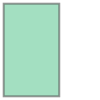

In [30]:
pol1.envelope

In [31]:
?pol1.envelope

### 4.2.3 exterior

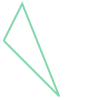

In [32]:
pol1.exterior

In [33]:
pol1.exterior.xy

(array('d', [1.0, 2.0, 4.0, 1.0]), array('d', [1.0, 3.0, -2.0, 1.0]))

In [34]:
pol1.envelope.exterior.xy

(array('d', [1.0, 4.0, 4.0, 1.0, 1.0]),
 array('d', [-2.0, -2.0, 3.0, 3.0, -2.0]))

### 4.2.4 area

In [35]:
pol1.area

4.5

This is a simple triangle, so we could easily find its area. For more general shapes, there is the [Shoelace Formula](https://en.wikipedia.org/wiki/Shoelace_formula)

In [36]:
def area_shoelace(p, is_area=True):
    x, y = p.exterior.xy[0], p.exterior.xy[1]
    A = 0.5 * sum([x[i]*y[i+1] - x[i+1]*y[i] for i in range(len(x)-1)])
    if is_area:
        return abs(A)
    else:
        return A

In [37]:
area_shoelace(pol1)

4.5

In [38]:
pol2.area

21.255

In [39]:
area_shoelace(pol2)

21.255

### 4.2.5 centroid

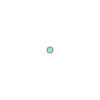

In [40]:
pol1.centroid

In [41]:
pol1.centroid.xy

(array('d', [2.3333333333333335]), array('d', [0.6666666666666666]))

In [42]:
pol2.centroid.xy

(array('d', [2.3692307692307693]), array('d', [5.1]))

Once again, we can calculate this from scratch

In [43]:
def centroid_from_scratch(p):
    
    '''
    https://en.wikipedia.org/wiki/Centroid#Of_a_polygon
    '''
    x, y = p.exterior.xy[0], p.exterior.xy[1]
    A = area_shoelace(p, is_area=False)
    Cx = (1/(6*A)) * sum([(x[i] + x[i+1])*(x[i]*y[i+1] - x[i+1]*y[i]) for i in range(len(x)-1)])
    Cy = (1/(6*A)) * sum([(y[i] + y[i+1])*(x[i]*y[i+1] - x[i+1]*y[i]) for i in range(len(x)-1)])
    return Cx, Cy

In [44]:
centroid_from_scratch(pol1)

(2.333333333333333, 0.6666666666666666)

In [45]:
centroid_from_scratch(pol2)

(2.369230769230769, 5.1)

# 5 Geometry collections

We can have collections of `Point`s, `LineString`s and `Polygon`s in a GeoPandas `geometry` field. So it is good to know about them

In [46]:
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon

In [47]:
mpt = MultiPoint([p1, p2, p3])
mln = MultiLineString([l1, l2])
mpo = MultiPolygon([pol1, pol2])

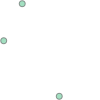

In [48]:
mpt

In [49]:
print(mpt)

MULTIPOINT (1 1, 2 3, 4 -2)


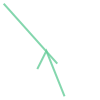

In [50]:
mln

In [51]:
print(mln)

MULTILINESTRING ((1 1, 2 3, 4 -2), (3.2 1.6, -2.7 8.199999999999999))


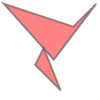

In [52]:
mpo

In [53]:
print(mpo)

MULTIPOLYGON (((1 1, 2 3, 4 -2, 1 1)), ((3.2 1.6, -2.7 8.199999999999999, 5.5 5.5, 8.199999999999999 8.199999999999999, 3.2 1.6)))


One nice method to know is the `convex_hull`. We can call this on any geometry collection

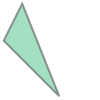

In [54]:
mpt.convex_hull

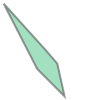

In [55]:
mln.convex_hull

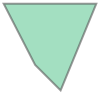

In [56]:
mpo.convex_hull

One important property for `MultiPolygon`s is whether they are **valid** -- if their components do not intersect one another.

In [57]:
mpo.is_valid

False

Let's quickly define one that **is** valid

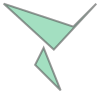

In [58]:
pol3 = Polygon([(3.2, 2.8), (-2.7, 8.2), (5.5, 5.5), (8.2, 8.2)])
mpo2 = MultiPolygon([pol1, pol3])
mpo2

In [59]:
mpo2.is_valid

True